>[Examen Diplomatura de Ciencias de Datos (Python)](#scrollTo=i0zFildainmZ)

>>[Datos del Grupo (Ingrese los datos de los miembros del grupo)](#scrollTo=DpCP10zljkUr)

>>[Criterio de evaluación](#scrollTo=aQ3knDmSjoC4)

>>[Herramientas utilizadas](#scrollTo=ELfqvndSj9Ur)

>>[Problema](#scrollTo=hXPW4ICqknzA)

>>[Carga de datos](#scrollTo=9C6E_XIYkFY9)

>>[Preparación de datos](#scrollTo=QF80Zxg1kIyw)

>>>[Librerias utilizadas](#scrollTo=C2S_LaS2Zqqh)

>>>[Funciones de carga de datos](#scrollTo=AMj8mPzQY88y)

>>>[Otras funciones utilizadas](#scrollTo=53goG0JwZCqs)

>>[Análisis: Promedio de expectativa de vida](#scrollTo=zBlq7CMHkTe9)

>>[Visualizaciones](#scrollTo=Tr34SrWqkWNo)

>>[Conclusión](#scrollTo=5VV58D2TuD2e)

>>[Persistencia (Almacenamiento)](#scrollTo=cHHGyZyhkZyU)



# Examen Diplomatura de Ciencias de Datos (Python)

A continuación, se detallan las indicaciones para la resolución del examen. Tengan a bien leer todas las instrucciones y no dude en consultar si tiene alguna duda.

1. El examen se realiza de forma grupal de acuerdo a la asignación previamente realizada (Grupo 1, Grupo 2, Grupo 3, Grupo 4, Grupo 5, Grupo 6)
2. La fecha de entrega es el Lunes 10 de Mayo a las 9:00 AM hs (Argentina). La entrega se deberá realizar por correo electrónico.
3. Tanto el código como el análisis y las visualizaciones se deben entregan en un notebook en formato **.ipynb**
4. Puede utilizar diferentes herramientas para el desarrollo como Jupyter, Colab, Spypder o VSCodium, sin embargo, el trabajo final debe ser entregado en un notebook como estipulado en el punto 3.
5. Para visualizaciones se debe utilizar la librería **matplotlib** solamente.
6. La defensa del trabajo se realizará el Lunes 10 de Mayo a las 18:30 hs de forma grupal. Se les brindará un espacio de 20 minutos para la exposición y espacio a preguntas.
7. La nota se obtendrá en base a un promedio entre el desarrollo del trabajo, defensa del mismo en forma grupal y exposición individual. 
8. Los archivos a utilizar se encuentran almacenados en la siguientes URL:

https://github.com/al34n1x/DataScience/blob/master/100.Examen/examen_births.csv

https://github.com/al34n1x/DataScience/blob/master/100.Examen/examen_life_expectancy.csv

---




## Datos del Grupo (Ingrese los datos de los miembros del grupo)

Nombre y Apellido | LU
------------------|---




## Criterio de evaluación

Se les brindará dos archivos los cuales deben ser importados y proceder a trabajar con los mismos aplicando los conceptos de explicados en clase.

Como parte del examen se evaluarán los siguientes conceptos:

* Importar datos desde fuentes externas
* Preparación de datos en estructuras tipo diccionarios/arreglos 
* Gestión de datos
* Visualizaciones
* Almacenamiento de resultados


---


## Herramientas utilizadas

A continuación detallen las herramientas utilizadas para el desarrollo del examen.



*   Colab
*   Teams
*   Python built-in
*   Librerias Python:
  *   csv
  *   numpy
  *   matplotlib






---

## Problema

El ayuntamiento de Barcelona le ha solicitado al equipo de científicos de datos realizar un análisis sobre la expectativa de vida y el nivel de natalidad en cada uno de los distritos de la comunidad.
Para ello les requieren:

* Cargar los datos provistos en formato CSV en estructuras de diccionarios.
* Para cada distrito obtener el promedio de expectativa de vida, discriminado por genero.
* Obtener el/los distritos con mayor y menor natalidad respectivamente.
* Realizar una comparación entre los distritos con mayor expectativa de vida y su nivel de natalidad
* Generar visualizaciones que muestren los resultados como parte del análisis.
* Desarrollar una conclusión sobre el análisis. 
* Almacenar los resultados en archivos en formato CSV.



**En cuanto al tratamiento de la muestra**

El principal inconveniente que se presenta es la existencia de datos sin valor en la esperanza de vida de algunos distritos, si asignáramos el valor cero (el cual es un valor extremo), podría derivar en un sesgo de información (Rechazos de valores Malos o valores extremos), por tanto y a fin de evitar obtener un promedio sesgado se dispuso, la obtención del mejor estimador para los valores vacíos, siendo este el promedio por periodo. Para poder llevar esta tarea adelante se establecieron los siguientes supuestos:



1.   **Sobre las diferencias muestrales entre los distritos:** las diferencias en la esperanza de vida entre los distritos no son lo suficientemente significativas dado que la calidad de vida dentro de un país Europeo no presenta diferencias significativas como para justificar una estimación independiente por cada distrito, amen de que esto podría resultar en un nuevo sesgo estadístico dado el peso de los valores no declarados no resulta uniforme
2.   **Sobre las varianzas de la muestra:** Asumimos varianzas convergentes para cada uno de los distritos, sin diferencias significativas interdistritales 
3.   **Asumimos que el promedio por Periodo será insesgado, consistente y eficiente** por tanto en el limite tendera a ser representativo de todos los valores muestrales será el valor que producirá las menores distorsiones a la hora de determinar el promedio interdistrital y en caso de producir desvíos estos serán mínimos.


## Librerias utilizadas

In [27]:
import csv
import numpy as np
import matplotlib.pyplot as plt

##Carga de datos
 
(Recuerden colocar los archivos correspondientes en la ruta './sample_data')


In [28]:
def read_file (path):
  with open(path, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file,delimiter=';')
    counter = 0
    dic = {}
    for row in csv_reader:
      dic[counter]={
                'Year': row['Year'],
                'District Code': row['District Code'],
                'District Name': row['District Name'],
                'Neighborhood Code': row['Neighborhood Code'],
                'Neighborhood Name' : row['Neighborhood Name'],
                'Gender': row['Gender'],
                'Number': int(row['Number'].split('.')[0] or 0)
                  }
      counter+=1       
  return dic

def read_file (path):
  with open(path, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file,delimiter=';')
    counter = 0
    dic = {}
    for row in csv_reader:
      dic[counter]={
                'District Name': row['District Name'],
                'Neighborhood' : row['Neighborhood'],
                '2006-2010' : float(row['2006-2010'] or 0),
                '2007-2011' : float(row['2007-2011'] or 0),
                '2008-2012' : float(row['2008-2012'] or 0),
                '2009-2013' : float(row['2009-2013'] or 0),
                '2010-2014' : float(row['2010-2014'] or 0),
                'Gender': row['Gender']
                  }
      counter+=1       
  return dic

## Preparación de datos

### Otras funciones utilizadas

In [29]:
def get_gender_list(gender):
  empty_list=[]
  for i in expect_dic.values():
    if (i.get("Gender") == gender):
      empty_list.append(i)
  return empty_list


def get_specific_key(key,gender_list):
  district = None
  empty_list = []
  for i in gender_list:
    if (district == None or district != i.get(key)):
      district = i.get(key)
      empty_list.append(district)
  return empty_list


def get_life_expectancy(districts_list, gender_list):
  final_dict = {}
  for i in districts_list:
    district = i
    a_list = []
    for i in gender_list:
      if (i["District Name"]==district):
        for j in i.values():
          if (type(j)==float):
            a_list.append(j)
    final_dict[district] = a_list
    
  return final_dict


def get_average_value(years_list, gender_list):
  a_dictionary = {}
  for i in years_list:
    a_list = []
    for j in gender_list:
      a_list.append(j.get(i))
    value = sum(a_list)/len(a_list)
    a_dictionary[i] = value
  return a_dictionary


def get_database_with_no_cero_values(gender_list, years_list, average_values):
  for i in gender_list:
    for j in years_list:
      if (i.get(j) == 0.0):
        i[j] = average_values.get(j)
  return gender_list


def get_average_per_district(districts, life_expectancy):
  for i in districts:
    value = life_expectancy.get(i)
    value = np.average(value)
    value = float(value)
    life_expectancy[i] = round(value,2)
  return life_expectancy


def get_top(dictionary, number = 3):
  dic = {}
  for i in range(number):
    max = None
    value = None
    for k,v in dictionary.items():
      if (max == None or max < v):
        max = v
        value = k
    dic[value] = max
    dictionary.pop(value)
  return dic


def get_total_average(male_average,female_average, districts):
  final_dict = {}
  for i in districts:
    final_dict[i] = (male_average.get(i)+female_average.get(i))/2
  return final_dict


def calculate_sum(dic):
  index_key = list(dic.keys())[0]
  qty_of_keys = list(dic[index_key].keys())
  for k_1 in dic.keys():
    for k_2 in qty_of_keys:
      dic[k_1].update({
      k_2: round(np.sum(dic[k_1].get(k_2)),1)
    })

  return dic


def create_birth_dict (path):
  try:
    with open(path, mode="r") as csv_file:
      csv_reader = csv.DictReader(csv_file,delimiter=";")
      row_number = 2
      dic = {}
      for row in csv_reader:
        dic[row_number]={
                  "Year": row["Year"],
                  "District Code": row["District Code"],
                  "District Name": row["District Name"],
                  "Neighborhood Code": row["Neighborhood Code"],
                  "Neighborhood Name" : row["Neighborhood Name"],
                  "Gender": row["Gender"],
                  "Number": int(row["Number"].split(".")[0] or 0)
                    }
        row_number +=1       
    return dic
  except:
    print("Por favor cargue el archivo .csv en el directorio ./sample_data/")


def create_district_dict(dic):
  return_dict = {}
  column_to_sum = []
  first_key = list(dic.keys())[0]
  first_value = list(dic.values())[0]
  for i in first_value:
    if str(type(dic[first_key][i])) in ("<class 'float'>","<class 'int'>"):
      column_to_sum.append(i)
  for k, v in dic.items():
    if v.get("Gender") in ("Girls", "Female"):
      new_gender = "Female"
    elif v.get("Gender") in ("Boys", "Male"):
      new_gender = "Male"
    value_to_add = []
    for i in column_to_sum:
      value_to_add.append(v.get(i))
    if not return_dict.get(v.get("District Name")):
      return_dict[v.get("District Name")] = {
            new_gender : value_to_add
      }
    else:
      stored_info = return_dict[v.get("District Name")].get(new_gender) or []
      return_dict[v.get("District Name")][new_gender] = stored_info + value_to_add
  
  return return_dict


def calculate_top_rate(dic, type, gender, operator, qty):

  simple_dict = {}
  top_dict = {}
  if gender == "Both":
    for k, v in dic.items():
      simple_dict[k] = (v.get("Female") + v.get("Male")) / operator
  else:
    for k, v in dic.items():
      simple_dict[k] = v.get(gender)
  
  sorted_district_data = {k: v for k, v in sorted(simple_dict.items(), key=lambda item: item[1])}

  if type == "max":
    sorted_list = list(sorted_district_data.keys())[-qty:]
  else:
    sorted_list = list(sorted_district_data.keys())[:qty]

  for district_name in sorted_list:
    top_dict[district_name] = sorted_district_data.get(district_name)

  return top_dict

def prepare_data_to_plot (dic):
  keys = []
  values = []
  data_list = []
  for k, v in dic.items():
    keys.append(k)
    values.append(v)

  data_list.append(keys)
  data_list.append(np.array(values))

  return data_list

def save_data(dic, header, file_name):
  with open(file_name, mode='w') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=header)

    writer.writeheader()
    for k, v in dic.items():
      writer.writerow({header[0]: k, header[1]: v})

## 1- Análisis: Promedio de expectativa de vida

Explicacion del approach al problema.

Contamos con una base de datos, la cual contiene varias columnas:

1.   Distrito
2.   Barrio
3.   2006 - 2010
4.   2007 - 2011
5.   2007 - 2011
6.   2008 - 2012
7.   2009 - 2013
8.   2010 - 2014
4.   Género

Debemos obtener la expectativa de vida en promedio de cada distrito, discriminado por genero.

Existen varios inconvenintes a tener en cuenta a la hora de diseñar nuestro codigo para abordar la problematica:

1.   Los campos de expectativa de vida posen valores vacíos.
2.   No existen dos listas, una con femeninos y otro con masculinos. Para diferenciar se utiliza la columna "Género"
3.   Cada distrito a su vez posee numerosos barrios.


En primer lugar, hemos considerado pertinente separar la base de datos en dos grupos, filtrando asi por genero: Masculinos (male) y Femeninos (female). 
Para esto, haremos uso de algunas de las funciones declaradas con anterioridad:

```
def get_gender_list(gender):
  empty_list=[]
  for i in expect_dic.values():
    if (i.get("Gender") == gender):
      empty_list.append(i)
  return empty_list
```


In [30]:
path_examen_births = './sample_data/examen_births.csv'
path_examen_life_expectancy = './sample_data/examen_life_expectancy.csv'

In [31]:
expect_dic = read_file(path_examen_life_expectancy)
gender_m = "Male"
gender_f = "Female"
male = get_gender_list(gender_m)
female = get_gender_list(gender_f)

print(male)

print("="*13489)

print(female)

[{'District Name': 'Ciutat Vella', 'Neighborhood': 'el Raval', '2006-2010': 77.9, '2007-2011': 75.1, '2008-2012': 75.7, '2009-2013': 76.2, '2010-2014': 76.5, 'Gender': 'Male'}, {'District Name': 'Ciutat Vella', 'Neighborhood': 'el Barri Gòtic', '2006-2010': 81.3, '2007-2011': 78.6, '2008-2012': 78.9, '2009-2013': 79.5, '2010-2014': 78.7, 'Gender': 'Male'}, {'District Name': 'Ciutat Vella', 'Neighborhood': 'la Barceloneta', '2006-2010': 78.3, '2007-2011': 75.0, '2008-2012': 75.8, '2009-2013': 78.6, '2010-2014': 75.9, 'Gender': 'Male'}, {'District Name': 'Ciutat Vella', 'Neighborhood': 'Sant Pere', '2006-2010': 80.9, '2007-2011': 78.0, '2008-2012': 77.7, '2009-2013': 78.8, '2010-2014': 78.3, 'Gender': 'Male'}, {'District Name': 'Eixample', 'Neighborhood': 'el Fort Pienc', '2006-2010': 83.0, '2007-2011': 80.7, '2008-2012': 80.9, '2009-2013': 80.2, '2010-2014': 81.4, 'Gender': 'Male'}, {'District Name': 'Eixample', 'Neighborhood': 'la Sagrada Família', '2006-2010': 83.2, '2007-2011': 80.6,

El inconveniente principal que se presenta, es la existencia de datos con valor '0.0'. Luego de debatir las alternativas para solucionarlo se determino 

```
def get_average_value(years_list, gender_list):
  a_dictionary = {}
  for i in years_list:
    a_list = []
    for j in gender_list:
      a_list.append(j.get(i))
    value = sum(a_list)/len(a_list)
    a_dictionary[i] = value
  return a_dictionary
```


In [32]:
years_list = ['2006-2010','2007-2011','2008-2012','2009-2013','2010-2014']

f_dictionary = get_average_value(years_list, female)
m_dictionary = get_average_value(years_list, male)

print(m_dictionary)
print(f_dictionary)

{'2006-2010': 78.18472222222216, '2007-2011': 76.89305555555555, '2008-2012': 76.18333333333334, '2009-2013': 77.58194444444445, '2010-2014': 79.00000000000001}
{'2006-2010': 84.59861111111111, '2007-2011': 83.45972222222223, '2008-2012': 82.48333333333333, '2009-2013': 83.99722222222222, '2010-2014': 85.59166666666667}


Teniendo cada dicionario con los valores promedios de la expectativa de vida discriminada por años y por genero, daremos paso la reconfiguracion  de la base de datos

```
def get_database_with_no_cero_values(gender_list, years_list, average_values):
  for i in gender_list:
    for j in years_list:
      if (i.get(j) == 0.0):
        i[j] = average_values.get(j)
  return gender_list
```

In [33]:
new_male = get_database_with_no_cero_values(male, years_list, m_dictionary)
new_female = get_database_with_no_cero_values(female, years_list,f_dictionary)

print(new_male)
print('----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(new_female)

[{'District Name': 'Ciutat Vella', 'Neighborhood': 'el Raval', '2006-2010': 77.9, '2007-2011': 75.1, '2008-2012': 75.7, '2009-2013': 76.2, '2010-2014': 76.5, 'Gender': 'Male'}, {'District Name': 'Ciutat Vella', 'Neighborhood': 'el Barri Gòtic', '2006-2010': 81.3, '2007-2011': 78.6, '2008-2012': 78.9, '2009-2013': 79.5, '2010-2014': 78.7, 'Gender': 'Male'}, {'District Name': 'Ciutat Vella', 'Neighborhood': 'la Barceloneta', '2006-2010': 78.3, '2007-2011': 75.0, '2008-2012': 75.8, '2009-2013': 78.6, '2010-2014': 75.9, 'Gender': 'Male'}, {'District Name': 'Ciutat Vella', 'Neighborhood': 'Sant Pere', '2006-2010': 80.9, '2007-2011': 78.0, '2008-2012': 77.7, '2009-2013': 78.8, '2010-2014': 78.3, 'Gender': 'Male'}, {'District Name': 'Eixample', 'Neighborhood': 'el Fort Pienc', '2006-2010': 83.0, '2007-2011': 80.7, '2008-2012': 80.9, '2009-2013': 80.2, '2010-2014': 81.4, 'Gender': 'Male'}, {'District Name': 'Eixample', 'Neighborhood': 'la Sagrada Família', '2006-2010': 83.2, '2007-2011': 80.6,

**Previo a la asignacion:**

{'District Name': 'Nou Barris', 'Neighborhood': 'Vallbona', '2006-2010': 0.0, '2007-2011': 0.0, '2008-2012': 0.0, '2009-2013': 0.0, '2010-2014': 78.4, 'Gender': 'Female'}

**Posterior a la asignación:**

{'District Name': 'Nou Barris', 'Neighborhood': 'Vallbona', '2006-2010': 84.59861111111111, '2007-2011': 83.45972222222223, '2008-2012': 82.48333333333333, '2009-2013': 83.99722222222222, '2010-2014': 78.4, 'Gender': 'Female'}

Teniendo ahora nuestra base de datos en condiciones optimas, es momento de dar paso a la obtencion de los datos solicitados

**Recordemos la consigna...**

"Para cada distrito obtener el promedio de expectativa de vida, discriminado por genero"

En primer lugar, obtenemos la totalidad de distritos que aprecen en la base de datos.

```
def get_specific_key(key,gender_list):
  district = None
  empty_list = []
  for i in gender_list:
    if (district == None or district != i.get(key)):
      district = i.get(key)
      empty_list.append(district)
  return empty_list
```



In [34]:
district = "District Name"

districts = get_specific_key(district,new_male)

print(districts)

['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts', 'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris', 'Sant Andreu', 'Sant Martí']


Luego, obtenemos la totalidad de datos referidos a la expectativa de vida diferenciado primeramente por genero, conformanose asi dos grandes grupos. Luego, cada subgrupo gracias a la estrucutra de dato tipo "Diccionario" creamos a traves del binomio 'Clave', 'Valor' una estructura la cual segmenta aun mas la informacion por distrito.

```
def get_life_expectancy(districts_list, gender_list):
  final_dict = {}
  for i in districts_list:
    district = i
    a_list = []
    for i in gender_list:
      if (i["District Name"]==district):
        for j in i.values():
          if (type(j)==float):
            a_list.append(j)
    final_dict[district] = a_list
    
  return final_dict
```


In [35]:
print("Male life expectancy by Districts: ")
m_life_expectancy = get_life_expectancy(districts, new_male)
print(m_life_expectancy)

print("\n")

print("Female life expectancy by Districts: ")
f_life_expectancy = get_life_expectancy(districts, new_female)
print(f_life_expectancy)

Male life expectancy by Districts: 
{'Ciutat Vella': [77.9, 75.1, 75.7, 76.2, 76.5, 81.3, 78.6, 78.9, 79.5, 78.7, 78.3, 75.0, 75.8, 78.6, 75.9, 80.9, 78.0, 77.7, 78.8, 78.3], 'Eixample': [83.0, 80.7, 80.9, 80.2, 81.4, 83.2, 80.6, 81.0, 79.2, 81.3, 81.2, 78.9, 79.3, 79.1, 80.1, 82.3, 79.8, 80.3, 80.3, 80.8, 82.1, 79.9, 80.0, 81.4, 81.0, 81.7, 79.3, 79.4, 80.9, 79.8], 'Sants-Montjuïc': [80.6, 78.2, 78.7, 82.0, 78.8, 83.1, 80.3, 79.9, 83.0, 80.0, 81.5, 77.9, 78.1, 84.2, 78.8, 81.2, 78.9, 78.7, 78.2, 79.8, 83.9, 80.9, 80.4, 81.8, 80.9, 83.5, 81.2, 81.2, 83.5, 82.0, 81.7, 79.5, 80.2, 82.4, 81.6], 'Les Corts': [83.0, 81.1, 81.4, 81.8, 82.4, 83.9, 82.0, 82.1, 82.1, 83.5, 84.7, 82.7, 83.3, 80.7, 83.6], 'Sarrià-Sant Gervasi': [78.9, 77.6, 77.8, 81.0, 79.0, 83.7, 81.1, 81.2, 76.0, 81.7, 84.7, 83.0, 83.2, 78.0, 83.9, 83.5, 81.7, 81.8, 79.6, 82.5, 83.6, 81.2, 81.3, 81.3, 81.9, 83.7, 81.3, 81.7, 81.2, 82.5], 'Gràcia': [82.6, 80.2, 80.6, 80.9, 80.9, 81.4, 79.6, 80.7, 80.1, 81.4, 79.6, 77.6, 78.6, 80

Para finalizar, nos resta obtener el promedio de la expectativa de vida de cada distrito. Empleamos la siguiente funcion

```
def get_average_per_district(districts, life_expectancy):
  for i in districts:
    value = life_expectancy.get(i)
    value = np.average(value)
    value = float(value)
    life_expectancy[i] = round(value,2)
  return life_expectancy
```

In [36]:
male_average = get_average_per_district(districts , m_life_expectancy)
female_average = get_average_per_district(districts , f_life_expectancy)

print("Male average life expectancy by districts: ")
print(male_average)
print('='*223)
print("Female average life expectancy by districts: ")
print(female_average)

Male average life expectancy by districts: 
{'Ciutat Vella': 77.78, 'Eixample': 80.64, 'Sants-Montjuïc': 80.76, 'Les Corts': 82.55, 'Sarrià-Sant Gervasi': 81.32, 'Gràcia': 80.32, 'Horta-Guinardó': 79.84, 'Nou Barris': 77.99, 'Sant Andreu': 79.81, 'Sant Martí': 80.7}
Female average life expectancy by districts: 
{'Ciutat Vella': 85.83, 'Eixample': 87.04, 'Sants-Montjuïc': 86.75, 'Les Corts': 87.91, 'Sarrià-Sant Gervasi': 86.71, 'Gràcia': 86.84, 'Horta-Guinardó': 86.01, 'Nou Barris': 85.93, 'Sant Andreu': 87.03, 'Sant Martí': 87.08}


Finalmente daremos paso a la obtencion de los tres distritos con mayor expectativa de vida. Para ello, en primer lugar, generaremos una copia de nuestro diccionario el cual contiene los valores promedios por distrito.
En la proxima celda veremos el por qué

In [37]:
male_copy = male_average.copy()

female_copy = female_average.copy()

male_copy

{'Ciutat Vella': 77.78,
 'Eixample': 80.64,
 'Gràcia': 80.32,
 'Horta-Guinardó': 79.84,
 'Les Corts': 82.55,
 'Nou Barris': 77.99,
 'Sant Andreu': 79.81,
 'Sant Martí': 80.7,
 'Sants-Montjuïc': 80.76,
 'Sarrià-Sant Gervasi': 81.32}

Con la siguiente funcion, obtendremos finalmente los tres distritos, a traves de la manipulacion de la copia generada.



```
def get_top(dictionary, number = 3):
  dic = {}
  for i in range(number):
    max = None
    value = None
    for k,v in dictionary.items():
      if (max == None or max < v):
        max = v
        value = k
    dic[value] = max
    dictionary.pop(value)
  return dic
```

En esta funcion hacemos uso del valor por default, en el caso en que el usuario olvide colocarlo. Del mismo modo le permite obtener otra cantidad de valores, un top 5 por ejemplo

In [38]:
f_top_3 = get_top(female_copy)
m_top_3 = get_top(male_copy)


print("Top 3 highest life expectancy districts (Male)")
print(m_top_3)

print('='*75)

print("Top 3 highest life expectancy districts (Female)")
print(f_top_3)

Top 3 highest life expectancy districts (Male)
{'Les Corts': 82.55, 'Sarrià-Sant Gervasi': 81.32, 'Sants-Montjuïc': 80.76}
Top 3 highest life expectancy districts (Female)
{'Les Corts': 87.91, 'Sant Martí': 87.08, 'Eixample': 87.04}


Daremos paso al siguiente punto, obteniendo el top 3 de los distritos con mayor promedio de expectativa de vida (esta vez, no estara discriminado por genero). Para ello empleamos:

```
def get_total_average(male_average, female_average, districts):
  final_dict = {}
  for i in districts:
    final_dict[i] = (male_average.get(i)+female_average.get(i))/2
  return final_dict
```
Luego, reutilizamos la funcion "*get_top(dictionary)*" para obtener el top 3 de distritos con mayor expectativa de vida.

In [39]:
t_top_dict = get_total_average(male_average, female_average, districts)
t_top_dict = get_top(t_top_dict)
t_top_dict

{'Les Corts': 85.22999999999999,
 'Sant Martí': 83.89,
 'Sarrià-Sant Gervasi': 84.01499999999999}

## 2- Análisis: Distritos con mayor y menor natalidad.

Obtenemos la cantidad de nacimientos totales de cada uno de ellos para

A traves de la funcion create_birth_dict, creamos un diccionario con todos los datos del archivo examen_births.csv

```
dic[row_number]={
    "Year": row["Year"],
    "District Code": row["District Code"],
    "District Name": row["District Name"],
    "Neighborhood Code": row["Neighborhood Code"],
    "Neighborhood Name" : row["Neighborhood Name"],
    "Gender": row["Gender"],
    "Number": int(row["Number"].split(".")[0] or 0)
}
```

In [40]:
birth_dict = create_birth_dict(path_examen_births)
print(birth_dict)

{2: {'Year': '2017', 'District Code': '1', 'District Name': 'Ciutat Vella', 'Neighborhood Code': '1', 'Neighborhood Name': 'el Raval', 'Gender': 'Boys', 'Number': 283}, 3: {'Year': '2017', 'District Code': '1', 'District Name': 'Ciutat Vella', 'Neighborhood Code': '2', 'Neighborhood Name': 'el Barri Gòtic', 'Gender': 'Boys', 'Number': 56}, 4: {'Year': '2017', 'District Code': '1', 'District Name': 'Ciutat Vella', 'Neighborhood Code': '3', 'Neighborhood Name': 'la Barceloneta', 'Gender': 'Boys', 'Number': 51}, 5: {'Year': '2017', 'District Code': '1', 'District Name': 'Ciutat Vella', 'Neighborhood Code': '4', 'Neighborhood Name': 'Sant Pere, Santa Caterina i la Ribera', 'Gender': 'Boys', 'Number': 90}, 6: {'Year': '2017', 'District Code': '2', 'District Name': 'Eixample', 'Neighborhood Code': '5', 'Neighborhood Name': 'el Fort Pienc', 'Gender': 'Boys', 'Number': 117}, 7: {'Year': '2017', 'District Code': '2', 'District Name': 'Eixample', 'Neighborhood Code': '6', 'Neighborhood Name': 'l

Con el diccionario ya creado, nuestro próximo paso es transformar el mismo en el siguiente formato:


```
{
  "District Name":
    {
    "Female": [Cada uno de los valores correspondientes],
    "Male": [Cada uno de los valores correspondientes]
    }
}
```

In [41]:
birth_district_dict = create_district_dict(birth_dict)
print(birth_district_dict)

{'Ciutat Vella': {'Male': [283, 56, 51, 90, 236, 53, 45, 92, 224, 48, 53, 90, 222, 36, 43, 94, 210, 49, 51, 93], 'Female': [219, 53, 50, 90, 217, 45, 47, 80, 207, 52, 46, 76, 204, 61, 46, 73, 213, 45, 54, 76]}, 'Eixample': {'Male': [117, 207, 185, 176, 218, 172, 132, 192, 177, 159, 226, 139, 141, 196, 209, 184, 234, 166, 135, 224, 194, 157, 223, 146, 125, 164, 192, 170, 192, 155], 'Female': [114, 183, 159, 164, 242, 130, 123, 208, 187, 165, 224, 136, 98, 197, 186, 152, 213, 167, 123, 209, 158, 173, 224, 148, 130, 179, 177, 159, 186, 136]}, 'Sants-Montjuïc': {'Male': [156, 4, 119, 42, 78, 81, 108, 155, 190, 9, 122, 47, 82, 76, 86, 202, 185, 5, 122, 36, 44, 79, 93, 169, 212, 8, 116, 36, 80, 70, 88, 196, 198, 7, 124, 38, 80, 60, 86, 181], 'Female': [174, 8, 117, 30, 64, 75, 96, 180, 183, 7, 113, 37, 71, 66, 78, 178, 170, 8, 122, 27, 62, 89, 90, 176, 146, 4, 116, 37, 76, 77, 93, 159, 147, 3, 125, 44, 75, 53, 100, 153]}, 'Les Corts': {'Male': [199, 101, 32, 182, 93, 35, 211, 91, 29, 166, 91

Luego, procedemos a sumar cada uno de los valores de los distritos, manteniendo la separacion por género. El resultado, es un diccionario con el siguiente formato:

```
{
  "District Name":
    {
    "Female": Suma de valores femeninos,
    "Male": Suma de valores masculinos
    }
}
```


In [42]:
added_birth_dict = calculate_sum(birth_district_dict)
print(added_birth_dict)

{'Ciutat Vella': {'Male': 2119, 'Female': 1954}, 'Eixample': {'Male': 5307, 'Female': 5050}, 'Sants-Montjuïc': {'Male': 3870, 'Female': 3629}, 'Les Corts': {'Male': 1563, 'Female': 1564}, 'Sarrià-Sant Gervasi': {'Male': 3312, 'Female': 3178}, 'Gràcia': {'Male': 2732, 'Female': 2531}, 'Horta-Guinardó': {'Male': 3379, 'Female': 3296}, 'Nou Barris': {'Male': 3552, 'Female': 3510}, 'Sant Andreu': {'Male': 3403, 'Female': 3020}, 'Sant Martí': {'Male': 5391, 'Female': 4977}, 'No consta': {'Male': 7, 'Female': 4}}


Una vez formalizada la estructura de datos con la que trabajaremos, calculamos los distritos con mayor y menor natalidad

In [43]:
max_birth_distrcits = calculate_top_rate(added_birth_dict, "max", "Both", 1, 3)
min_birth_distrcits = calculate_top_rate(added_birth_dict, "min", "Both", 1, 3)

print("Top 3 máximos en distritos: ", max_birth_distrcits)
print("Top 3 mínimos en distritos: ", min_birth_distrcits)

Top 3 máximos en distritos:  {'Sants-Montjuïc': 7499.0, 'Eixample': 10357.0, 'Sant Martí': 10368.0}
Top 3 mínimos en distritos:  {'No consta': 11.0, 'Les Corts': 3127.0, 'Ciutat Vella': 4073.0}


## 3- Análisis: Comparación entre los distritos con mayor expectativa de vida y su nivel de natalidad

Por ultimo, obtenemos la cantidad de nacimientos de los distritos con mayor expectativa de vida de la siguiente manera:

1.   Obtenemos la sumatoria de ambos generos por distrito
2.   Creamos un diccionario que contenga los distritos con mayor expectativa de vida y su total de nacimientos

In [44]:
#Obtenemos la sumatoria de ambos generos por distrito
total_birth_per_district = calculate_top_rate(added_birth_dict, "max", "Both", 1, 99)

#Creamos un diccionario que contenga los distritos con mayor expectativa de vida y su total de nacimientos
t_top_dict_birth = {}

for k in t_top_dict.keys():
  t_top_dict_birth[k] = total_birth_per_district[k]

birth_plt = prepare_data_to_plot (t_top_dict_birth)
t_top_dictt = prepare_data_to_plot(t_top_dict)

print("Data a graficar de nacimientos: ", birth_plt)
print("Data a graficar de expectativa de vida: ", t_top_dictt)

Data a graficar de nacimientos:  [['Les Corts', 'Sarrià-Sant Gervasi', 'Sant Martí'], array([ 3127.,  6490., 10368.])]
Data a graficar de expectativa de vida:  [['Les Corts', 'Sarrià-Sant Gervasi', 'Sant Martí'], array([85.23 , 84.015, 83.89 ])]


## Visualizaciones

<Introducir proceso/comentarios aquí>

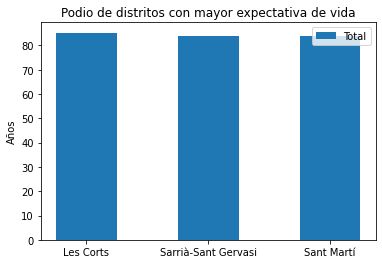

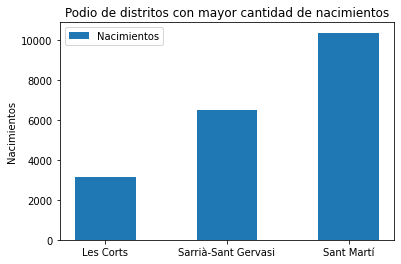

In [45]:
# Gráfico 1

labels = t_top_dictt[0]
people_means = t_top_dictt[1]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, people_means, width, label='Total')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Años')
ax.set_title('Podio de distritos con mayor expectativa de vida')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

'''----------------------------------'''
# Gráfico 2

labels = birth_plt[0]
people_means = birth_plt[1]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, people_means, width, label='Nacimientos')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nacimientos')
ax.set_title('Podio de distritos con mayor cantidad de nacimientos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.show()

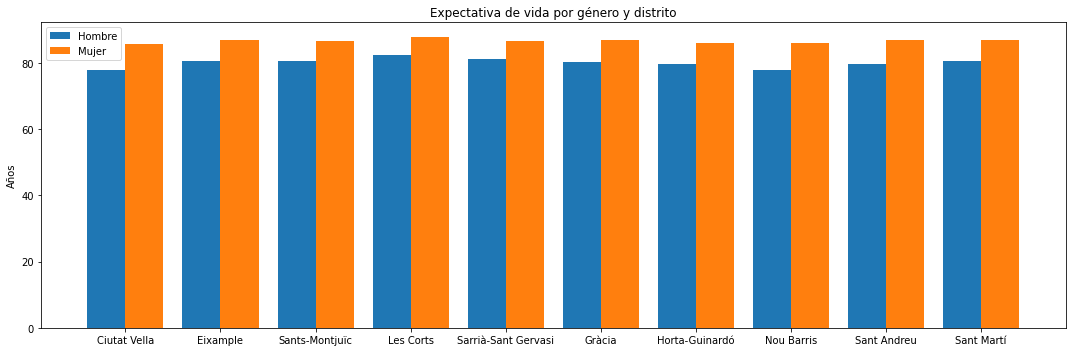

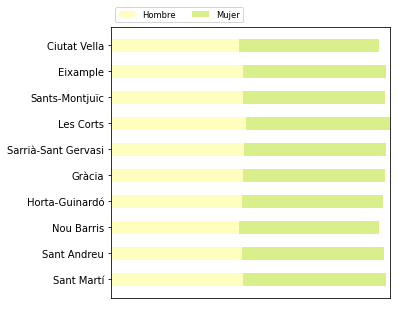

In [46]:
# Gráfico 3

male_average
female_average
district_list_age_male = []
district_list_age_female = []
district_list_plot = []

#generar diccionario con los keys de male o female y luego generar listas con las edades de cada uno de los keyes, en orden.
for district in male_average.keys():
    district_list_plot.append(district)

for district in district_list_plot:
    district_list_age_male.append(male_average.get(district))

for district in district_list_plot:
    district_list_age_female.append(female_average.get(district))


labels = district_list_plot
men_means = district_list_age_male
women_means = district_list_age_female

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars
fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - width/2, men_means, width, label='Hombre')
rects2 = ax.bar(x + width/2, women_means, width, label='Mujer')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Años')
ax.set_title('Expectativa de vida por género y distrito')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

'''-----------------------------------------'''

# Gráfico 4

category_names = ['Hombre','Mujer']

results = {}
for i in district_list_plot:
  empty_list = []
  empty_list.append(male_average.get(i))
  empty_list.append(female_average.get(i))
  results[i] = empty_list

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.50, 0.60, data.shape[1]))

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()



**Conclusiones** 

Al tomar el top 3 se observa que aquellos una relación inversa entre natalidad y esperanza de vida, el distrito de Mayor natalidad es el que guarda menor esperanza de vida.

Esta conclusión resulta coincidente con los últimos relevamientos realizados sobres las tendencias globales de los sistemas previsionales. En aquellos países donde existe un incremento significativo en la esperanza de vida, y por ende una mejora en la calidad de vida y del ingreso per cápita, se observa un envejecimiento continuo de la pirámide poblacional.



##Persistencia de los datos

Utilizanod la funcion save_data, guardamos en distintos archivos csv los resultados obtenidos.
Entre los parametros que se le pasan a la funcion, tenemos:
1. Diccionario a guardar
2. Nombre de los encabezados
3. Nombre del archivo a crear

In [47]:
save_data(t_top_dict, ["District Name", "Expectancy"], "top_expectancy.csv")
save_data(t_top_dict_birth, ["District Name", "Total Birth"], "birth_by_top_expectancy.csv")

save_data(max_birth_distrcits, ["District Name", "Total Birth"], "top_max_birth.csv")
save_data(min_birth_distrcits, ["District Name", "Total Birth"], "top_min_birth.csv")